<a href="https://colab.research.google.com/github/ChrisSsak/Stroke_GAN/blob/main/NeuralRenderer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
#stroke dataset
data = np.load('/content/drive/MyDrive/Yr3Project/strokedataset.npz', allow_pickle=True)

xdata=data['arr_0'] #params
ydata=data['arr_1'] #stroke



In [ ]:
import cv2
import numpy as np



newydata=np.array([cv2.resize(stroke, dsize=(216, 216), interpolation=cv2.INTER_CUBIC)for stroke in ydata])


In [ ]:
np.max(newydata)


1.0

In [ ]:
def normalize(l):
  a=l.astype('float32')
  a-=np.min(a)
  a/=np.max(a)
  return a

In [ ]:

newydata=np.array([cv2.normalize(a, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U) for a in newydata])#convert to uint8
newydata.shape

(10000, 216, 216)

In [ ]:
'''im0 = np.zeros((*newydata[0].shape,4), dtype=np.uint8)
im0.shape


(250, 250, 4)

In [ ]:
newydata=np.array(newydata0)

In [ ]:
np.unique(newydata[...,:3])

In [ ]:
newydata=normalize(newydata)

In [ ]:
np.min(newydata)

0.0

In [ ]:
newydata[0].shape

(250, 250)

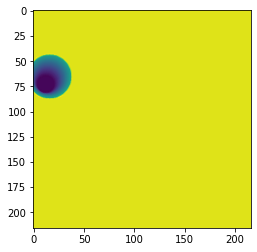

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(newydata[15])

In [ ]:
np.unique(newydata[15, :, :20])

array([0.69865906, 0.7011206 , 0.70116913, 0.70132476, 0.70133173,
       0.701338  , 0.70134205, 0.7013421 , 0.7013514 , 0.70135367,
       0.7019168 , 0.70267594, 0.70355874, 0.7039703 , 0.7040925 ,
       0.70671237, 0.7069612 , 0.7092399 , 0.70977414, 0.7111735 ,
       0.7112008 , 0.7112995 , 0.7124261 , 0.71606725, 0.7163088 ,
       0.71669304, 0.7177475 , 0.7182957 , 0.721928  , 0.72250956,
       0.7235477 , 0.723942  , 0.7290042 , 0.7300405 , 0.73011523,
       0.73031896, 0.730588  , 0.73139346, 0.73157567, 0.7316893 ,
       0.735758  , 0.7362027 , 0.7362063 , 0.73655283, 0.7369088 ,
       0.7376339 , 0.7386241 , 0.739537  , 0.74186426, 0.74200404,
       0.7427626 , 0.74314165, 0.7439869 , 0.74526215, 0.74529004,
       0.74723315, 0.747984  , 0.74875414, 0.74907064, 0.74927586,
       0.7493585 , 0.75160056, 0.75236607, 0.7527487 , 0.75289667,
       0.7531578 , 0.7542602 , 0.75504315, 0.7568446 , 0.7604339 ,
       0.76045203, 0.7604771 , 0.7612539 , 0.7628517 , 0.76312

In [ ]:


xtrain=xdata[:9000]#training
ytrain=newydata[:9000]


xtest=xdata[9000:]#testing
ytest=newydata[9000:]

In [ ]:
import keras
from keras.models import Model
from keras.layers import Input, Flatten,Dense, Convolution2D, MaxPooling2D
from keras.optimizers import Adam

import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization,Reshape,Conv2DTranspose
from keras.layers import LeakyReLU

In [ ]:
'''
def renderer_model():
  model = tf.keras.Sequential() #decoder
  model.add(Dense(7*7*256, use_bias=False, input_shape=(100,)))
  model.add(BatchNormalization())
  model.add(LeakyReLU())

  model.add(Reshape((7, 7, 256)))
  assert model.output_shape == (None, 7, 7, 256) # Note: None is the batch size

  model.add(Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
  assert model.output_shape == (None, 7, 7, 128)
  model.add(BatchNormalization())
  model.add(LeakyReLU())

  model.add(Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
  assert model.output_shape == (None, 14, 14, 64)
  model.add(BatchNormalization())
  model.add(LeakyReLU())

  model.add(Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
  assert model.output_shape == (None, 28,28,1)
  return model

SyntaxError: ignored

In [ ]:
for l in 

In [ ]:
'''renderer = renderer_model()
tf.keras.utils.plot_model(renderer, show_shapes=True, dpi=64)

In [ ]:
'''import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.nn.utils.weight_norm as weightNorm
from keras.layers import Input,Lambda,UpSampling2D

class FCN(nn.Module):
    def __init__(self):
        super(FCN, self).__init__()
        self.fc1 = (nn.Linear(10, 512))
        self.fc2 = (nn.Linear(512, 1024))
        self.fc3 = (nn.Linear(1024, 2048))
        self.fc4 = (nn.Linear(2048, 4096))
        self.conv1 = (nn.Conv2d(16, 32, 3, 1, 1))
        self.conv2 = (nn.Conv2d(32, 32, 3, 1, 1))
        self.conv3 = (nn.Conv2d(8, 16, 3, 1, 1))
        self.conv4 = (nn.Conv2d(16, 16, 3, 1, 1))
        self.conv5 = (nn.Conv2d(4, 8, 3, 1, 1))
        self.conv6 = (nn.Conv2d(8, 4, 3, 1, 1))
        self.pixel_shuffle = nn.PixelShuffle(2)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = x.view(-1, 16, 16, 16)
        x = F.relu(self.conv1(x))
        x = self.pixel_shuffle(self.conv2(x))
        x = F.relu(self.conv3(x))
        x = self.pixel_shuffle(self.conv4(x))
        x = F.relu(self.conv5(x))
        x = self.pixel_shuffle(self.conv6(x))
        x = torch.sigmoid(x)
        return 1 - x.view(-1, 128, 128)

In [ ]:
from keras.layers import Input,Lambda,UpSampling2D
def NeuralRenderer():
  x_in=Input(shape=(10,))
  x=Dense(100,activation='relu')(x_in)
  x=Dense(150,activation='relu')(x)
  x=Dense(200,activation='relu')(x)
  x=Dense(512,activation='relu')(x)
  x=Reshape([ 8, 8, 8])(x)
  x=keras.layers.UpSampling3D(size=(2,2,2))(x)
  x = Convolution2D(filters=32,kernel_size=3,strides=1,padding="valid",activation='relu',name="conv1")(x)# input 16
  x = Convolution2D(filters=32,kernel_size=3,strides=1,padding="valid",activation='relu',name="conv2")(x)#  input 32
  sub_layer1 = Lambda(lambda x:tf.nn.depth_to_space(x,2))

  x = sub_layer1(inputs=x)
  x = Convolution2D(filters=16,kernel_size=3,strides=1,padding="valid",activation='relu',name="conv3")(x)#   input 8
  x = Convolution2D(filters=16, kernel_size=3,strides=1,padding="valid",activation='relu',name="conv4")(x)#   input 16

  sub_layer2 = Lambda(lambda x:tf.nn.depth_to_space(x,2))
  x = sub_layer2(inputs=x)

  x = Convolution2D(filters=8, kernel_size=3,strides=1,padding="valid",activation='relu',name="conv5")(x)#   input 4
  x = Convolution2D(filters=16, kernel_size=3,strides=1,padding="valid",activation='relu',name="conv6")(x) #   input 8

  sub_layer3 = Lambda(lambda x:tf.nn.depth_to_space(x,2))
  x = sub_layer3(inputs=x)

  x = tf.keras.layers.Activation(activation='sigmoid')(x)
  
  model = keras.models.Model(x_in, outputs=x, name=None)
  return model

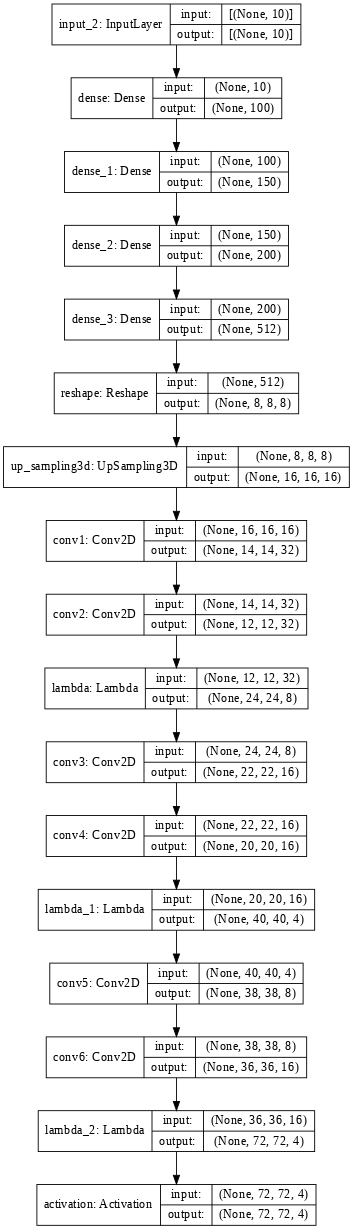

In [ ]:
model=NeuralRenderer()
tf.keras.utils.plot_model(model, show_shapes=True, dpi=64)

In [ ]:
from keras.layers import Input,Lambda,UpSampling2D, BatchNormalization
def NeuralRenderer():
  x_in=Input(shape=(10,))
  x=Dense(100,activation='relu')(x_in)
  x=BatchNormalization()(x)
  #x=Dense(150,activation='relu')(x)
  #x=BatchNormalization()(x)
  x=Dense(200,activation='relu')(x)
  x=BatchNormalization()(x)
  x=Dense(512,activation='relu')(x)
  x=BatchNormalization()(x)
  x=Reshape([ 8, 8, 8])(x)
  x=keras.layers.UpSampling3D(size=(2,2,2))(x)

  x = Convolution2D(filters=32,kernel_size=3,strides=1,padding="valid",activation='relu',name="conv1")(x)# input 16
  x=BatchNormalization()(x)
  x = Convolution2D(filters=16,kernel_size=3,strides=1,padding="valid",activation='relu',name="conv2")(x)#  input 32
  x=BatchNormalization()(x)

  x=keras.layers.UpSampling2D(size=(2,2))(x)

  x = Convolution2D(filters=16,kernel_size=3,strides=1,padding="valid",activation='relu',name="conv3")(x)#   input 8
  x=BatchNormalization()(x)
  x = Convolution2D(filters=8, kernel_size=3,strides=1,padding="valid",activation='relu',name="conv4")(x)#   input 16
  x=BatchNormalization()(x)

  x=keras.layers.UpSampling2D(size=(2,2))(x)

  x = Convolution2D(filters=8, kernel_size=3,strides=1,padding="valid",activation='relu',name="conv5")(x)#   input 4
  x=BatchNormalization()(x)
  x = Convolution2D(filters=8, kernel_size=3,strides=1,padding="valid",activation='relu',name="conv6")(x) #   input 8
  x=BatchNormalization()(x)

  x=keras.layers.UpSampling2D(size=(2,2))(x)

  x = Convolution2D(filters=4, kernel_size=3,strides=1,padding="same",activation='relu',name="conv8")(x)#   input 4
  x=BatchNormalization()(x)
  x = Convolution2D(filters=1, kernel_size=1,name="conv10")(x) #   input 8
  
 
  

  x = tf.keras.layers.Activation(activation='sigmoid')(x)
  
  model = keras.models.Model(x_in, outputs=x, name=None)
  return model

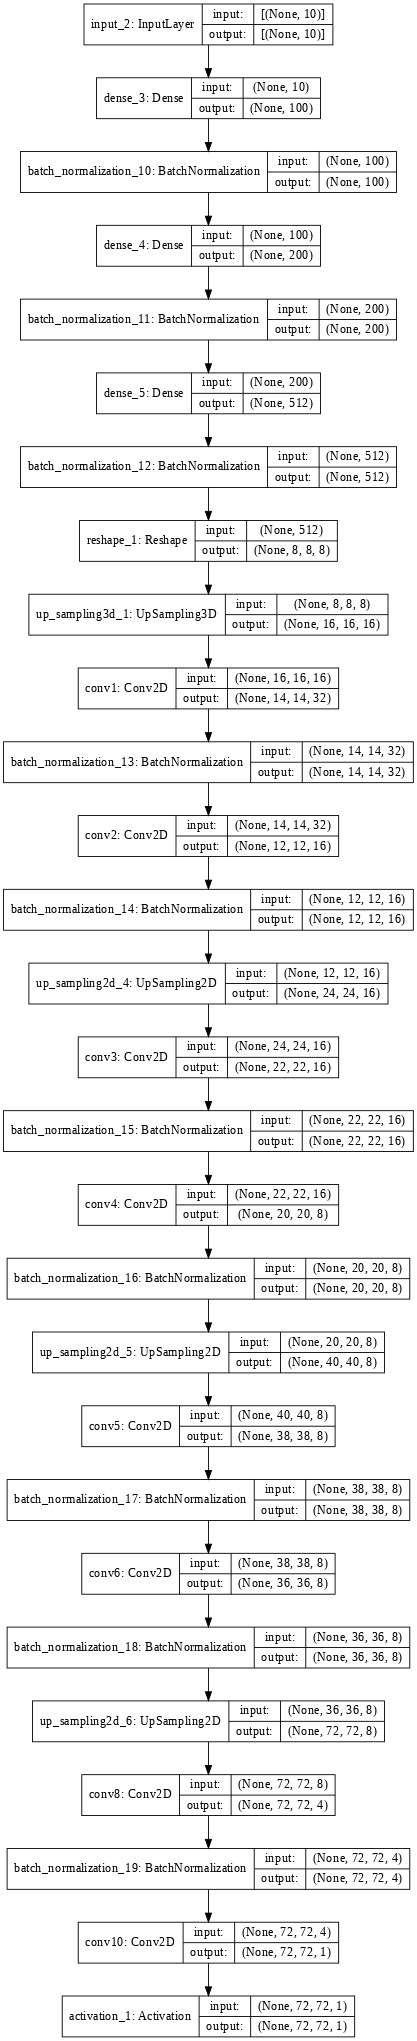

In [ ]:
model=NeuralRenderer()
tf.keras.utils.plot_model(model, show_shapes=True, dpi=64)

In [ ]:
from keras.layers import Input,Lambda,UpSampling2D, BatchNormalization
def NeuralRenderer():
  x_in=Input(shape=(10,))
  x=Dense(100,activation='relu')(x_in)
  x=BatchNormalization()(x)
  #x=Dense(150,activation='relu')(x)
  #x=BatchNormalization()(x)
  x=Dense(200,activation='relu')(x)
  x=BatchNormalization()(x)
  x=Dense(512,activation='relu')(x)
  x=BatchNormalization()(x)
  x=Reshape([ 8, 8, 8])(x)
  x=keras.layers.UpSampling3D(size=(2,2,2))(x)

  x = Convolution2D(filters=32,kernel_size=3,strides=1,padding="valid",activation='relu',name="conv1")(x)# input 16
  x=BatchNormalization()(x)
  x = Convolution2D(filters=16,kernel_size=3,strides=1,padding="valid",activation='relu',name="conv2")(x)#  input 32
  x=BatchNormalization()(x)

  x=keras.layers.UpSampling2D(size=(2,2))(x)

  x = Convolution2D(filters=16,kernel_size=3,strides=1,padding="valid",activation='relu',name="conv3")(x)#   input 8
  x=BatchNormalization()(x)
  x = Convolution2D(filters=8, kernel_size=3,strides=1,padding="valid",activation='relu',name="conv4")(x)#   input 16
  x=BatchNormalization()(x)

  x=keras.layers.UpSampling2D(size=(2,2))(x)

  x = Convolution2D(filters=8, kernel_size=3,strides=1,padding="valid",activation='relu',name="conv5")(x)#   input 4
  x=BatchNormalization()(x)
  x = Convolution2D(filters=8, kernel_size=3,strides=1,padding="valid",activation='relu',name="conv6")(x) #   input 8
  x=BatchNormalization()(x)

  x=keras.layers.UpSampling2D(size=(2,2))(x)

  x = Convolution2D(filters=4, kernel_size=3,strides=1,padding="same",activation='relu',name="conv8")(x)#   input 4
  x=BatchNormalization()(x)
  x = Convolution2D(filters=1, kernel_size=1,name="conv10")(x) #   input 8
  
  x=keras.layers.UpSampling2D(size=(3,3))(x)
  

  x = tf.keras.layers.Activation(activation='sigmoid')(x)
  
  model = keras.models.Model(x_in, outputs=x, name=None)
  return model

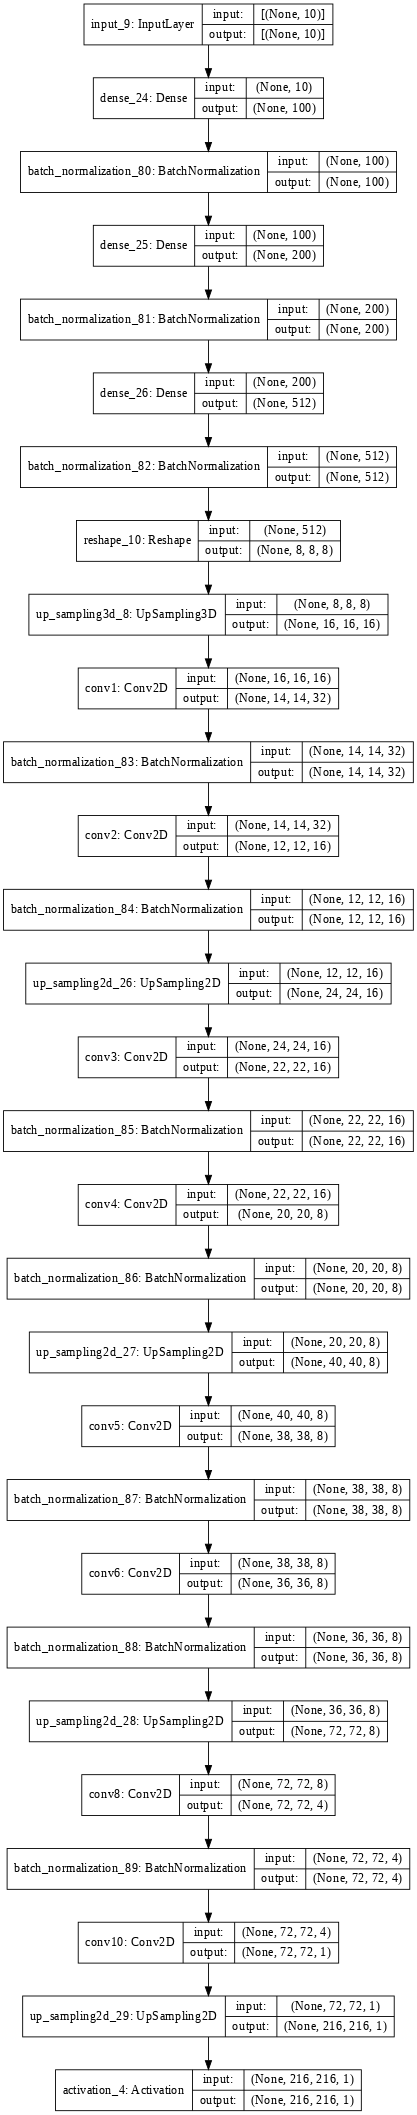

In [ ]:
model=NeuralRenderer()
tf.keras.utils.plot_model(model, show_shapes=True, dpi=64)

In [ ]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

opt=Adam(learning_rate=2e-3, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(optimizer=opt, loss='mae')#, metrics=['mse'])
h=model.fit(xtrain, ytrain, batch_size=64, epochs=140, validation_split=0.1, callbacks=[ReduceLROnPlateau(patience=3, verbose=1), ModelCheckpoint('/content/drive/My Drive/Yr3Project/renderer_model_normvol2.h5', save_best_only=True, verbose=1)])

Epoch 1/140
127/127 [==============================] - 75s 579ms/step - loss: 0.2689 - val_loss: 0.1578

Epoch 00001: val_loss improved from inf to 0.15783, saving model to /content/drive/My Drive/Yr3Project/renderer_model_normvol2.h5
Epoch 2/140
127/127 [==============================] - 73s 575ms/step - loss: 0.0826 - val_loss: 0.1558

Epoch 00002: val_loss improved from 0.15783 to 0.15583, saving model to /content/drive/My Drive/Yr3Project/renderer_model_normvol2.h5
Epoch 3/140
127/127 [==============================] - 74s 581ms/step - loss: 0.0617 - val_loss: 0.1082

Epoch 00003: val_loss improved from 0.15583 to 0.10822, saving model to /content/drive/My Drive/Yr3Project/renderer_model_normvol2.h5
Epoch 4/140
127/127 [==============================] - 73s 576ms/step - loss: 0.0581 - val_loss: 0.0637

Epoch 00004: val_loss improved from 0.10822 to 0.06370, saving model to /content/drive/My Drive/Yr3Project/renderer_model_normvol2.h5
Epoch 5/140
127/127 [===========================

KeyboardInterrupt: ignored

In [ ]:
from tensorflow.keras.models import load_model#prediction& evaluation
model = load_model('/content/drive/My Drive/Yr3Project/renderer_model_normvol2.h5')
predictions=model.predict(xtest)
evaluation=model.evaluate(xtest,ytest)


32/32 [==============================] - 4s 105ms/step - loss: 0.0328


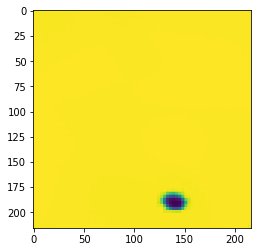

In [ ]:
a=predictions[66]
plt.imshow(a[...,0])


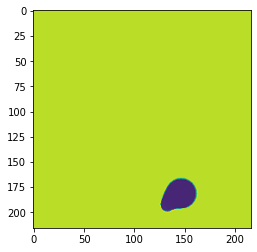

In [ ]:
plt.imshow(ytest[66])

0.95531464

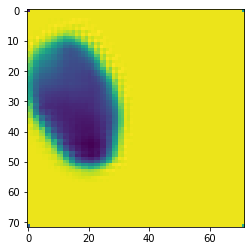

In [ ]:
a=predictions[0]
plt.imshow(a[...,0])
np.max(ytest[0])

array([0.38077432], dtype=float32)

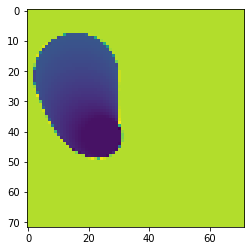

In [ ]:
plt.imshow(ytest[0])

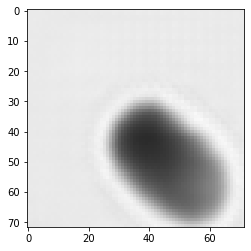

In [ ]:
a=predictions[100].astype('uint8')
plt.imshow(a)

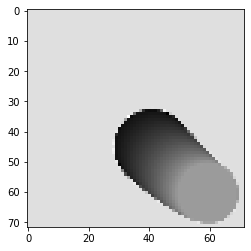

In [ ]:
plt.imshow(ytest[100])

In [ ]:
np.unique(a)

array([  0,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,
        18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,
        31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,
        44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,
        57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,
        83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,
        96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108,
       109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121,
       122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134,
       135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147,
       148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160,
       161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173,
       174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 18

In [ ]:
'''def NeuralRenderer2():
  x_in=Input(shape=(10,))
  x=Dense(512,activation='relu')(x_in)
  x=Dense(1024,activation='relu')(x)
  x=Dense(2048,activation='relu')(x)
  x=Dense(4096,activation='relu')(x)
  x=Reshape([ 16, 16, 16])(x)
  x = Convolution2D(filters=32,kernel_size=3,strides=1,padding="valid",activation='relu')(x)#1 input 16
  x = Convolution2D(filters=32,kernel_size=3,strides=1,padding="valid",activation='relu',name="conv2")(x)#2  input 32

  x = UpSampling2D(size=2,interpolation="bilinear")(x)

  x = Convolution2D(filters=16, kernel_size=3,strides=1,padding="valid",activation='relu')(x)#3   input 8
  x = Convolution2D(filters=16, kernel_size=3,strides=1,padding="valid",activation='relu',name="conv4")(x)#4   input 16
  
  x = UpSampling2D(size=2,interpolation="bilinear")(x)

  x = Convolution2D(filters=8, kernel_size=3,strides=1,padding="valid",activation='relu')(x)#5   input 4
  x = Convolution2D(filters=16, kernel_size=3,strides=1,padding="valid",activation='relu',name="conv6")(x) #6   input 8
  
  x = UpSampling2D(size=2,interpolation="bilinear")(x)

  x = tf.keras.layers.Activation(activation='sigmoid')(x)
  #x=Reshape([250,250,4])(x)
  model = keras.models.Model(x_in, outputs=x, name=None)
  return model

In [ ]:
'''model=NeuralRenderer2()
tf.keras.utils.plot_model(model, show_shapes=True, dpi=64)